# Bioinformatics and Lab I — Environment Setup for **Term Project Mission 2**


```
Bioinformatics and Lab I
Interdisciplinary Program in Bioinformatics / School of Biological Sciences, Seoul National University
Spring 2025

This notebook may be reused under the terms of the Creative Commons BY‑SA license.
Hyeshik Chang <hyeshik@snu.ac.kr>, School of Biological Sciences, SNU
```

This notebook prepares the environment so you can tackle **Mission 2** of the Term Project on **Google Colab**. If you prefer to work on your own computer or a lab workstation, first install the required software and then open the notebook there. When Colab misbehaves (packages refuse to install, kernel crashes, …) choose **`Runtime → Disconnect and delete runtime`** and start again.


## Mount Google Drive

We’ll connect Google Drive so we can read and save data.  
Click the link that appears, authenticate, paste the code, and your Drive will be available under `/content/drive`. If you are not using Colab and your machine has plenty of local storage you can skip this step.


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install the Bioconda environment

If you’re not on Colab (e.g. using a workstation or your laptop), set up a [Bioconda](https://bioconda.github.io/) environment locally and open this notebook inside it.

For Colab users the commands below will create and activate a ready‑made environment that contains every tool needed for Mission 2.


In [73]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 5.58 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.bashrc.biolab
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.condarc
./root/.profile
./root/.tmux.conf
./root/.vimrc
--2025-05-15 06:21:06--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 

Once the environment has initialised, open a console (**`⋯ → Terminal`**) so you can run shell commands.


## Download the sequencing data  
*Skip this section if you already copied the data during the first practical.*

We will download the sequencing data needed for Mission 2. On Colab the data will live inside your Google Drive folder `binfo1-datapack1`; you only need to fetch it once.


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

### (Option 2) When working **outside** Colab

If you’re on your own machine or a lab workstation, download the data with the command shown below. `wget` sometimes fails on the first attempt—just run it again. Replace `/content/drive/MyDrive` with the directory where you want the files.


In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

Next, fetch the **GENCODE** annotation in advance. If you hit an error, simply run the command again.


In [ ]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

Unpack the annotation archive so it’s easier to handle.


In [ ]:
!gunzip /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz

### Verify file checksums  
*Skip if you already did this during the first practical.*

Run `md5sum` to verify the integrity of the downloaded files. The expected checksums are listed below—compare your output with the reference list.


In [ ]:
!md5sum drive/MyDrive/binfo1-datapack1/*

In [ ]:
!ls -al drive/MyDrive/binfo*

# 파일 복사하기
**첫 시간에 파일을 복사해 두었으면 이 부분은 생략하고 다음으로 넘어갑니다.**

공유한 폴더를 나의 작업 폴더로 복사합니다.

In [ ]:
!mkdir -p /content/drive/MyDrive/binfo1-work
%cd /content/drive/MyDrive/binfo1-work
!cp -f /content/drive/MyDrive/binfo1-datapack1/*.* /content/drive/MyDrive/binfo1-work/

# Copy the data files  
*Skip if you already did this during the first practical.*

Copy the shared folder into your working directory (or wherever you prefer) so you can access it quickly.


In [ ]:
!conda install -y bedtools bioawk samtools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: / - \ | / done

## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - bedtools
    - bioawk
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.31.1            |       h13024bc_3         1.5 MB  bioconda
    bioawk-1.0                 |      h577a1d6_13         198 KB  bioconda
    c-ares-1.34.5              |       hb9d3cd8_0         202 KB  conda-forge
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    conda-25.3.1               |  py313h78bf25f_1         1.1 MB  conda-forge
    expat-2.7.0                |       h5888daf_0         137 KB  conda-forge
    htslib-1.21                |       h566b1c6_1         3.0 MB  bioconda
    icu-75.1                   |       he02047a_0        11.6 MB  conda-forge

## Mission 2

In this mission we will inspect the distribution of ribosome‑protected fragments (RPFs) around **start codons**.  
A typical RPF 5′‑end profile shows a peak just upstream of a start codon, followed by a 3‑nt periodic pattern across the CDS. Let’s reproduce that figure.


In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


First, extract only those **exons that contain a start codon**. If a gene has multiple isoforms we risk double‑counting reads, so we’ll keep a single representative transcript (e.g. the one with TSL 1).


In [ ]:
!grep '	start_codon	.*	+	.*transcript_support_level "1"' ../binfo1-datapack1/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-start.gtf
!head gencode-start.gtf

chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000134384.8
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000027036.11
chr1	HAVANA	start_codon	4878137	4878139	.	+	0	ENSMUST00000150971.8
chr1	HAVANA	start_codon	4928137	4928139	.	+	0	ENSMUST00000081551.14
chr1	HAVANA	start_codon	5154674	5154676	.	+	0	ENSMUST00000044369.13
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000160777.8
chr1	HAVANA	start_codon	5659272	5659274	.	+	0	ENSMUST00000027038.11
chr1	HAVANA	start_codon	6300227	6300229	.	+	0	ENSMUST00000027040.13
chr1	HAVANA	start_codon	6429555	6429557	.	+	0	ENSMUST00000133144.4
chr1	HAVANA	start_codon	6839122	6839124	.	+	0	ENSMUST00000140079.8


Because we’ll focus on start codons we pre‑select **exons on the + strand**. (On the − strand we would mirror everything.) You *could* run the code on all strands but it will be slower and adds no benefit here.


In [ ]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!grep '	exon	.*	+	' ../binfo1-datapack1/gencode.gtf | \
 sed -e 's/	[^	]*transcript_id "\([^"]*\)".*$/	\1/g' > gencode-plusexon.gtf
!head gencode-plusexon.gtf

chr1	HAVANA	exon	3143476	3144545	.	+	.	ENSMUST00000193812.2
chr1	ENSEMBL	exon	3172239	3172348	.	+	.	ENSMUST00000082908.3
chr1	HAVANA	exon	3322980	3323459	.	+	.	ENSMUST00000192857.2
chr1	HAVANA	exon	3536810	3536910	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3583628	3583776	.	+	.	ENSMUST00000161581.2
chr1	HAVANA	exon	3602018	3602943	.	+	.	ENSMUST00000192183.2
chr1	HAVANA	exon	3750378	3752011	.	+	.	ENSMUST00000193244.2
chr1	HAVANA	exon	3822233	3824583	.	+	.	ENSMUST00000194454.2
chr1	HAVANA	exon	4566774	4569601	.	+	.	ENSMUST00000193450.2
chr1	HAVANA	exon	4567697	4567877	.	+	.	ENSMUST00000194935.2


Next, intersect the exon list with the start‑codon list and keep only entries that belong to the **same transcript**. While we’re at it we’ll convert coordinates to BED format and sort the output so that `bedtools` can handle it efficiently.


In [ ]:
# 아래 공백 중 일부는 "탭(Tab)" 문자입니다. 입력하기 힘들 때는 텍스트 편집기에서 입력해서 복사&붙여넣기 하면 됩니다.
!bedtools intersect -a gencode-start.gtf -b gencode-plusexon.gtf -wa -wb | \
 awk -F'	' -v OFS='	' '$9 == $18 { print $10, $13-1, $14, $18, $4-1, $16; }' | \
 sort -k1,1 -k2,3n -k4,4 > gencode-exons-containing-startcodon.bed
!head gencode-exons-containing-startcodon.bed; tail gencode-exons-containing-startcodon.bed

chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4928036	4928199	ENSMUST00000081551.14	4928136	+
chr1	5154639	5154786	ENSMUST00000044369.13	5154673	+
chr1	5659227	5659528	ENSMUST00000027038.11	5659271	+
chr1	5659257	5659528	ENSMUST00000160777.8	5659271	+
chr1	6300182	6300297	ENSMUST00000027040.13	6300226	+
chr1	6429441	6429738	ENSMUST00000133144.4	6429554	+
chr1	6839121	6839176	ENSMUST00000043578.13	6839121	+
chrY	80939672	80939804	ENSMUST00000185340.2	80939686	+
chrY	81470683	81470815	ENSMUST00000187135.2	81470697	+
chrY	82237903	82238035	ENSMUST00000185636.2	82237917	+
chrY	83043623	83043755	ENSMUST00000187165.2	83043637	+
chrY	84109956	84110088	ENSMUST00000185776.7	84109970	+
chrY	84759361	84759493	ENSMUST00000186110.2	84759375	+
chrY	86074448	86074580	ENSMUST00000188754.2	86074462	+
chrY	87129500	87129632	ENSMUST00000189543.7	87129514	+
chrY	87563647	87563779	ENSMUST0000

Column 4 now holds the *transcript ID* and column 5 the start‑codon position. You may notice a few duplicated start codons. That’s slightly messy but acceptable for this exercise; in a real project you’d deduplicate them.


In [ ]:
!(samtools view -H ../binfo1-datapack1/RPF-siLuc.bam; \
  samtools view -F20 ../binfo1-datapack1/RPF-siLuc.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLuc.bam

After that heavy lifting let’s check the file size—just to be sure nothing exploded.


In [ ]:
!ls -al *RPF-siLuc.bam

-rw------- 1 root root  554373659 May 15 03:39 filtered-RPF-siLuc.bam
-rw------- 1 root root 1055123479 May 12 10:38 RPF-siLuc.bam


Now count the **5′ ends** of the reads. `bedtools genomecov` is perfect for this task.


In [ ]:
!bedtools genomecov -ibam filtered-RPF-siLuc.bam -bg -5 > fivepcounts-RPF-siLuc.bed
!head fivepcounts-RPF-siLuc.bed

chr1	3176534	3176535	1
chr1	3196256	3196257	1
chr1	3221526	3221527	1
chr1	3221542	3221543	2
chr1	3221545	3221546	3
chr1	3221546	3221547	2
chr1	3221548	3221550	1
chr1	3221571	3221572	1
chr1	3221897	3221898	1
chr1	3221994	3221995	1


From the resulting coverage keep only reads that overlap the exons containing a start codon (the set we created earlier).


In [ ]:
!bedtools intersect -a fivepcounts-RPF-siLuc.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLuc.txt
!head fivepcounts-filtered-RPF-siLuc.txt

chr1	4878048	4878049	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878048	4878049	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878077	4878078	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878077	4878078	1	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878101	4878102	4	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878101	4878102	4	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+
chr1	4878101	4878102	4	chr1	4878052	4878205	ENSMUST00000150971.8	4878136	+
chr1	4878103	4878104	1	chr1	4878010	4878205	ENSMUST00000134384.8	4878136	+
chr1	4878103	4878104	1	chr1	4878045	4878205	ENSMUST00000027036.11	4878136	+


All set! Now try to reproduce **Figure S5A** from the paper.

* Use only **start codons** (ignore stop codons for this mission).  
* The paper kept challenging regions and avoided collapsing overlapping reads, so your profile may look smoother—but that’s fine for the purpose of the practical.


In [ ]:
!(samtools view -H ../binfo1-datapack1/RPF-siLin28a.bam; \
  samtools view -F20 ../binfo1-datapack1/RPF-siLin28a.bam | \
  bioawk -c sam '{ if (length($seq) >= 25) print $0; }') | \
 samtools view -b -o filtered-RPF-siLin28a.bam
!bedtools genomecov -ibam filtered-RPF-siLin28a.bam -bg -5 > fivepcounts-RPF-siLin28a.bed
!bedtools intersect -a fivepcounts-RPF-siLin28a.bed -b gencode-exons-containing-startcodon.bed \
 -wa -wb -nonamecheck > fivepcounts-filtered-RPF-siLin28a.txt

In [49]:
!awk -F'\t' '{print $2-$9, $4}' fivepcounts-filtered-RPF-siLuc.txt | awk '{sum[$1] += $2} END {for (i in sum) printf "%d,%d\n", i, sum[i]}' > RPF_siLuc_positions.csv
!awk -F'\t' '{print $2-$9, $4}' fivepcounts-filtered-RPF-siLin28a.txt | awk '{sum[$1] += $2} END {for (i in sum) printf "%d,%d\n", i, sum[i]}' > RPF_siLin28a_positions.csv

In [79]:
# 여기에 새로 코드를 작성해서 논문 그림과 비슷하게 만들어 봅시다.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
siLuc_counts = pd.read_csv('RPF_siLuc_positions.csv', names=['position', 'count'])
siLin28a_counts = pd.read_csv('RPF_siLin28a_positions.csv', names=['position', 'count'])

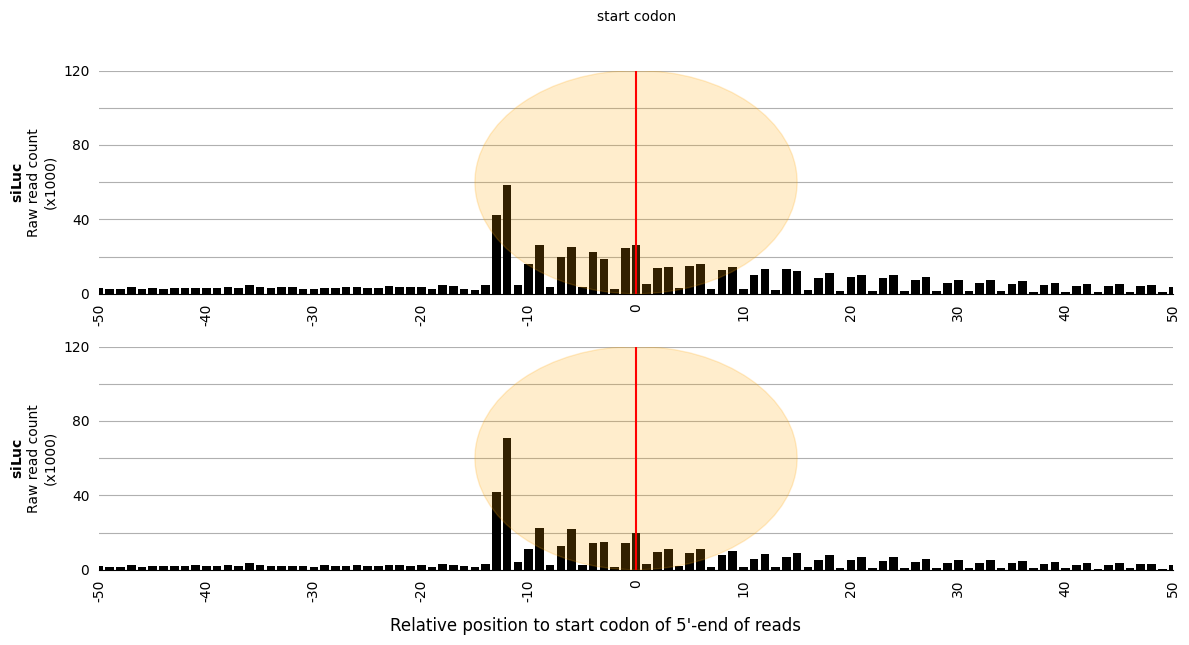

In [80]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=False)

axs[0].bar(siLuc_counts['position'], siLuc_counts['count'] / 1000, color='black')
axs[1].bar(siLin28a_counts['position'], siLin28a_counts['count'] / 1000, color='black')

major_yticks = np.arange(0, 121, 40)
minor_yticks = np.arange(0, 121, 20)
xticks = np.arange(-50,51,10)
for ax in axs:
  ax.set_axisbelow(True)

  ax.set_ylabel(r'$\bf{siLuc}$' '\nRaw read count' '\n(x1000)')
  ax.set_ylim(0,120)
  ax.set_xlim(-50,50)
  ax.axvline(0, c='red')

  ax.tick_params(axis='both', which='both', bottom=False, left=False)

  ax.set_xticks(xticks)
  ax.set_xticklabels(xticks, rotation=90)

  ax.set_yticks(major_yticks)
  ax.set_yticks(minor_yticks, minor=True)

  ax.grid(axis='y', which='both')

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

axs[0].add_patch(Ellipse(xy=(0, 60), width=30, height=120, edgecolor='orange', facecolor='orange', alpha=0.2))
axs[1].add_patch(Ellipse(xy=(0, 60), width=30, height=120, edgecolor='orange', facecolor='orange', alpha=0.2))

plt.suptitle("Relative position to start codon of 5\'-end of reads", y=0)
plt.figtext(0.535, 1, 'start codon', ha='center', va='center')
plt.tight_layout()
plt.show()